# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


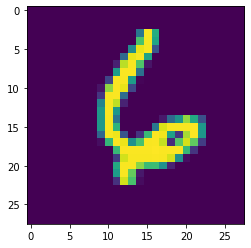

In [10]:
print (X_train.shape)
from matplotlib import pyplot as plt
plt.imshow(X_train[59000])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [14]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [16]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 26))
# model.add(Flatten())
# model.add(Activation('softmax'))



# model.add(Convolution2D(512, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Flatten())
# model.add(Dense(100, activation='relu'))
# model.add(Dense(10, activation='softmax'))


model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu',  input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [62]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)             

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [65]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
  576/60000 [..............................] - ETA: 18s - loss: 0.0111 - acc: 0.9948

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 17s 284us/step - loss: 0.0132 - acc: 0.9959
Epoch 2/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0111 - acc: 0.9964
Epoch 3/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0102 - acc: 0.9967
Epoch 4/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0089 - acc: 0.9970
Epoch 5/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0083 - acc: 0.9972
Epoch 6/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.0072 - acc: 0.9976
Epoch 7/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0073 - acc: 0.9976
Epoch 8/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.0057 - acc: 0.9982
Epoch 9/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0059 - acc: 0.9982
Epoch 10/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0065 - ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [67]:
print(score)

[0.0417724022251477, 0.992]


In [0]:
y_pred = model.predict(X_test)

In [69]:
print(y_pred[:9])
print(y_test[:9])

[[4.45293141e-19 1.12957668e-12 6.80078095e-16 1.44318346e-12
  1.24574426e-17 7.21962349e-15 2.97647396e-24 1.00000000e+00
  2.55953977e-14 1.15021673e-10]
 [1.91228441e-18 1.11538112e-14 1.00000000e+00 4.92985285e-17
  8.41358494e-24 1.13710999e-31 3.22677729e-19 2.51601317e-16
  1.57828840e-22 4.15954169e-20]
 [1.44222497e-17 1.00000000e+00 2.10809518e-15 2.66685077e-18
  2.55086588e-13 7.74591369e-14 5.85109184e-15 3.06619443e-12
  1.09915440e-12 3.49217920e-16]
 [1.00000000e+00 4.70793568e-19 3.25594548e-19 9.76695124e-20
  4.02383117e-23 8.72730388e-18 1.18479757e-13 1.73176283e-17
  8.02477194e-18 1.05749963e-13]
 [2.92545791e-17 8.87340657e-13 1.72827353e-15 5.30257349e-18
  1.00000000e+00 3.57218543e-16 7.43523285e-14 2.06936438e-15
  2.08933652e-12 2.46569935e-11]
 [2.78898874e-18 1.00000000e+00 1.85526156e-17 1.33581365e-20
  2.46593764e-16 4.71345989e-16 1.90646569e-17 1.35940933e-12
  2.66434298e-15 1.46073002e-16]
 [4.68560956e-19 2.91465412e-08 7.94702429e-11 2.76049493e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()